Nama     : **Muhamad Ilyas**               
Email    : **181240000831@unisnu.ac.id**   
Domisili : **Kabupaten Jepara, Jawa Tengah**

## Download Package

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.4/197.4 KB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 78.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 KB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.1/238.1 KB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━

## Importing Library

In [ ]:
import os
# import gdown
import zipfile
import pathlib

import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt

print(f'Tensorflow version: {tf.__version__}')

Tensorflow version: 2.11.0


## Data Preparation

In [ ]:
#check list directory datasets
listdir = os.listdir('/content/drive/MyDrive/Skripsi/Dataset')
print('List Folder Image')
for i in range (0,len(listdir)):
  print(f'{i+1}. {listdir[i]}')

List Folder Image
1. Jagung.zip
2. Mentimun.zip
3. Padi.zip
4. Tomat.zip


In [ ]:
local_zip = '/content/drive/MyDrive/Skripsi/Dataset/Mentimun.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#check list directory datasets
listdir = os.listdir('/content/Mentimun')
print('List Folder Image')
for i in range (0,len(listdir)):
  print(f'{i+1}. {listdir[i]}')

List Folder Image
1. Valid
2. Train


In [ ]:
data_dir = pathlib.Path('/content/Mentimun/Train')

image_count = len(list(data_dir.glob('*/*.jpg')))
print(f'Total image from this datasets : {image_count}')

print(f'\nDistribution Image')
for i, label in enumerate(os.listdir(data_dir)):
  label_dir = os.path.join(data_dir, label)
  len_label_dir = len(os.listdir(label_dir))
  print(f'{i+1}. {label} : {len_label_dir}')

Total image from this datasets : 469

Distribution Image
1. Mentimun_Ill : 227
2. Mentimun_good : 242


## Data preprocessing

### Set up Paramters

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

np.random.seed(123)
seed = np.random.randint(0,100)
print(f"Current seed : {seed}")

Current seed : 66


### Load data using a Keras utility

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=seed,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=seed,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE)

Found 469 files belonging to 2 classes.
Using 376 files for training.
Found 469 files belonging to 2 classes.
Using 93 files for validation.


In [ ]:
class_names = train_ds.class_names
class_names_val = val_ds.class_names

print(f'List label Train data: \n{class_names}\n')
print(f'List label Validation data: \n{class_names_val}')

List label Train data: 
['Mentimun_Ill', 'Mentimun_good']

List label Validation data: 
['Mentimun_Ill', 'Mentimun_good']


### Check Image batch

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


### Plot Data

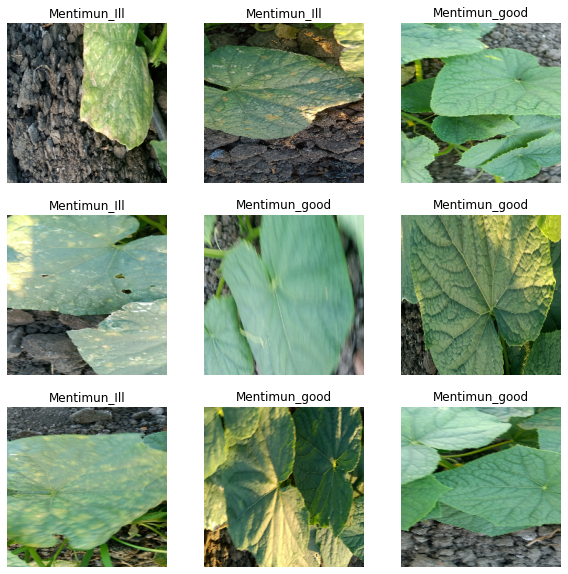

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Split Validation data to Test data

In [ ]:
val_batches = tf.data.experimental.cardinality(val_ds)
test_dataset = val_ds.take(val_batches // 5)
val_ds = val_ds.skip(val_batches // 5)

print('Number of validation batches: %d' % tf.data.experimental.cardinality(val_ds))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 3
Number of test batches: 0


### Configure data performance for Training

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

### Create Layer Model

#### Data Augmentation Layer

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2)],
  name="data_augmentation")

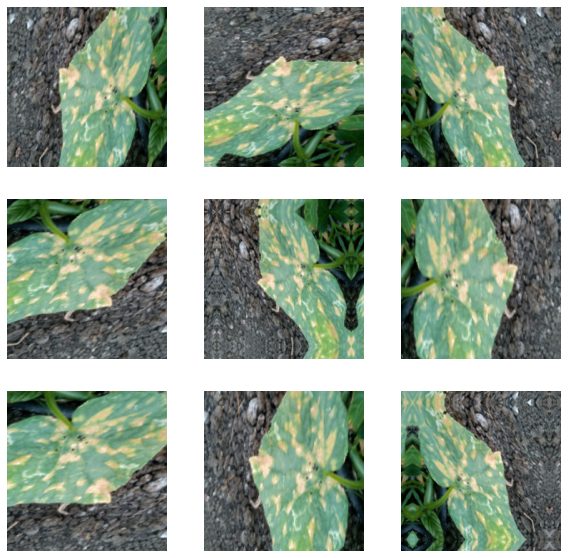

In [ ]:
for image, _ in train_ds.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

#### Rescale pixel Layer

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

#### Global Average Layer

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

#### Base Model Layer

In [ ]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

#### Input Layer

In [ ]:
inputs = tf.keras.Input(shape=IMG_SIZE + (3,))

### Create Model

In [ ]:
def model_builder():

  # Number Classes from data
  num_classes = len(class_names)

  # Create Model Sequential keras
  model = tf.keras.Sequential()

  # Add Custom Layer
  model.add(inputs)
  model.add(data_augmentation)
  model.add(normalization_layer)
  model.add(base_model)
  model.add(global_average_layer)

  # Add fully connected layer with dropout
  model.add(tf.keras.layers.Dense(units=512, activation="relu"))
  model.add(tf.keras.layers.Dropout(0.2))

  # Prediction Layer
  model.add(tf.keras.layers.Dense(num_classes, activation='softmax', name="final_output"))

  base_learning_rate = 1e-3
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

  return model

#### Define Callbacks

In [ ]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("checkpoint_model.h5", 
                                                      monitor="val_accuracy",
                                                      save_best_only=True,
                                                      verbose=1)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", 
                                                  patience=10, 
                                                  mode ="max", 
                                                  verbose=2, 
                                                  restore_best_weights=True)

In [ ]:
model = model_builder()
print(f"Model : {model}")

Model : <keras.engine.sequential.Sequential object at 0x7fcc07e015e0>


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                        

In [ ]:
history = model.fit(train_ds,
                    epochs=100,
                    validation_data=val_ds,
                    callbacks=[model_checkpoint, early_stopping])

Epoch 1/100


12/12 [==============================] - ETA: 0s - loss: 1.0682 - accuracy: 0.6968
Epoch 1: val_accuracy improved from -inf to 0.91398, saving model to checkpoint_model.h5
12/12 [==============================] - 32s 2s/step - loss: 1.0682 - accuracy: 0.6968 - val_loss: 0.2282 - val_accuracy: 0.9140
Epoch 2/100
12/12 [==============================] - ETA: 0s - loss: 0.2229 - accuracy: 0.9096
Epoch 2: val_accuracy improved from 0.91398 to 0.94624, saving model to checkpoint_model.h5
12/12 [==============================] - 22s 2s/step - loss: 0.2229 - accuracy: 0.9096 - val_loss: 0.1458 - val_accuracy: 0.9462
Epoch 3/100
12/12 [==============================] - ETA: 0s - loss: 0.1506 - accuracy: 0.9388
Epoch 3: val_accuracy did not improve from 0.94624
12/12 [==============================] - 16s 1s/step - loss: 0.1506 - accuracy: 0.9388 - val_loss: 0.2046 - val_accuracy: 0.9247
Epoch 4/100
12/12 [==============================] - ETA: 0s - loss: 0.1444 - accuracy: 0.9495
Epoch 4: val_

### Plot Result

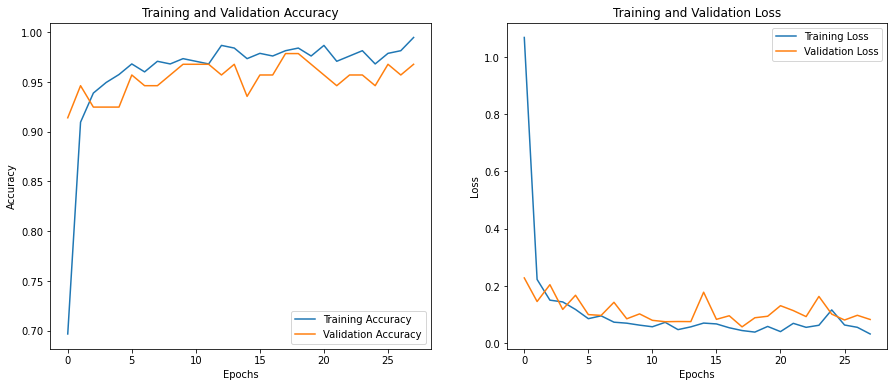

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## Convet Model Into JSON

In [ ]:
load_model = tf.keras.models.load_model('checkpoint_model.h5')
# load_model.evaluate(x=test_dataset, return_dict=True)

/usr/local/lib/python3.8/dist-packages/keras/utils/generic_utils.py:239: RuntimeWarning: divide by zero encountered in log10
  numdigits = int(np.log10(self.target)) + 1


OverflowError: ignored

Saving hama-dan-penyakit-tanaman-mentimun.jpg to hama-dan-penyakit-tanaman-mentimun.jpg
1/1 [==============================] - 1s 979ms/step
hama-dan-penyakit-tanaman-mentimun.jpg
Mentimun_Ill
[[0.6544301  0.34556994]]
0.6544301


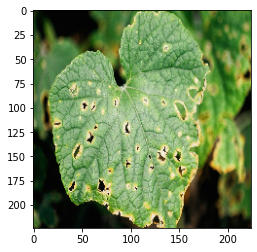

In [ ]:
from google.colab import files 
import keras.utils as image

uploaded =files.upload()
for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size= IMG_SIZE + (3,)) 
  x = image.img_to_array(img)
  x= np.expand_dims (x, axis=0)
  
  images = np.vstack([x])
  classes = load_model.predict(images, batch_size=10) 
  outclass = np.argmax(classes)
  
  print (fn)
  plt.imshow(img)
  for i, label in enumerate(class_names):
    if outclass == i:
      predict = classes[0][i]
      print(label)
      print(classes)
      print(predict)

In [ ]:
path_model = './saved'
output_path = '/content/output_path'
load_model.save(path_model)

In [ ]:
path_model=pathlib.Path(path_model)

In [ ]:
!tensorflowjs_converter --input_format=tf_saved_model \
                         --output_node_names='MobilenetV3/Predictions/Reshape_1' \
                         --saved_model_tags=serve \
                         './saved' \
                         output_path

2023-01-12 02:34:49.359967: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-01-12 02:34:49.360195: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-01-12 02:34:49.360239: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2023-01-12 02:34:53.106415: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to c

### Download Result

In [ ]:
import shutil
shutil.make_archive('/content/json-mentimun', 'zip', output_path)

'/content/json-mentimun.zip'